# Convex Functions and Optimization

For a convex function, any local minimum is also a global minimum. Optimization with convex functions is often well-behaved, as a global minimum is guaranteed. So, what is a convex function? I would say it is something akin to a bowl with no large ripples (local minima)—it is a nice smooth ride to the bottom. But that is not good enough; we need a mathematical definition.

A function $f: \mathbb{R}^n \to \mathbb{R}$ is convex if for all points $\mathbf{x}, \mathbf{y}$ in its domain and for all $\lambda \in [0, 1]$, the following inequality holds:
\begin{equation}
f(\lambda \mathbf{x} + (1-\lambda)\mathbf{y}) \leq \lambda f(\mathbf{x}) + (1-\lambda)f(\mathbf{y}).
\end{equation}

The geometric interpretation is as follows. The left side represents the function value at a point on the line segment connecting $\mathbf{x}$ and $\mathbf{y}$, while the right side represents the corresponding point on the line segment connecting $(\mathbf{x}, f(\mathbf{x}))$ and $(\mathbf{y}, f(\mathbf{y}))$ on the graph. Therefore, a function is convex if and only if the line segment (called the secant line) connecting any two points on its graph lies on or above the graph itself. Below is a plot exemplifying convexity. The left panel shows a convex function, while the right panel shows a non-convex function.

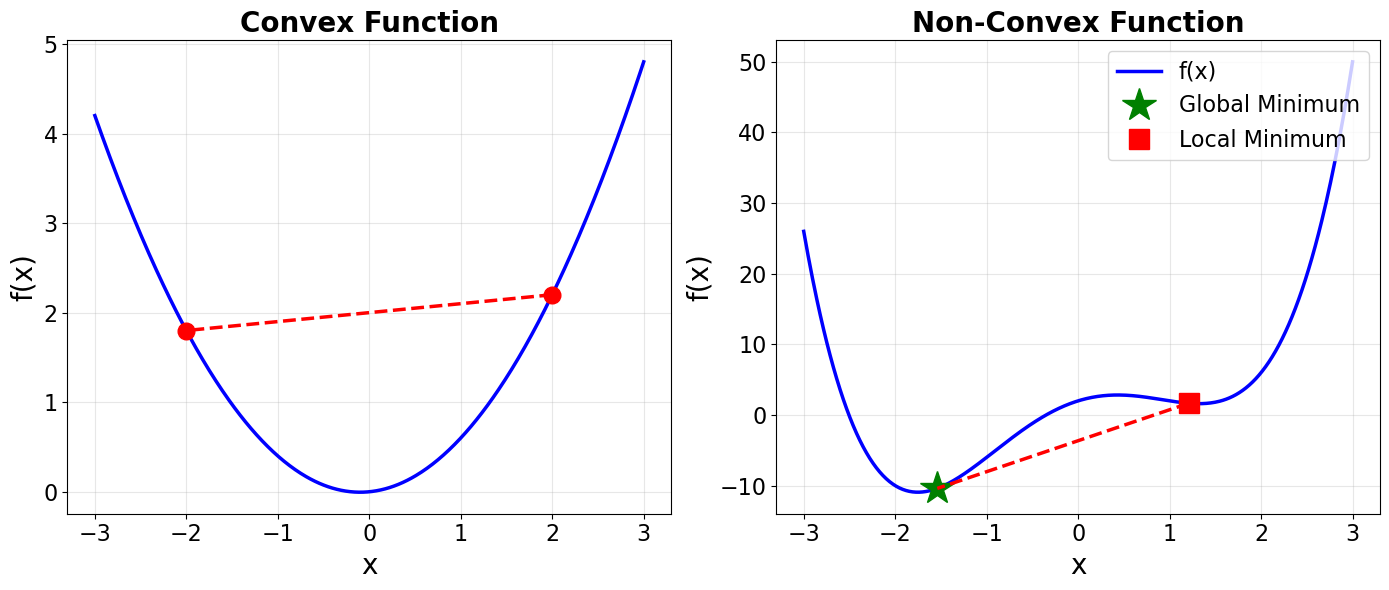

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ========== LEFT PANEL: CONVEX FUNCTION ==========
ax = axes[0]

# Define convex function
x = np.linspace(-3, 3, 500)
y = 0.5 * x**2 + 0.1 * x

# Plot the function
ax.plot(x, y, 'b-', linewidth=2.5, label='f(x)')

# Choose two points for the secant line
x1, x2 = -2, 2
y1 = 0.5 * x1**2 + 0.1 * x1
y2 = 0.5 * x2**2 + 0.1 * x2

# Create points along the line segment
lambdas = np.linspace(0, 1, 100)
x_line = lambdas * x1 + (1 - lambdas) * x2
y_secant = lambdas * y1 + (1 - lambdas) * y2
y_func = 0.5 * x_line**2 + 0.1 * x_line

# Plot the secant line
ax.plot(x_line, y_secant, 'r--', linewidth=2.5)

# Mark the endpoints
ax.plot([x1, x2], [y1, y2], 'ro', markersize=12)

# # Shade the region showing secant ≥ function
# ax.fill_between(x_line, y_func, y_secant, alpha=0.3, color='green',
#                 label='Secant ≥ Function')

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.set_title('Convex Function', fontsize=20, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=16)

# ========== RIGHT PANEL: NON-CONVEX FUNCTION ==========
ax = axes[1]

# Define non-convex function with local and global minima
x = np.linspace(-3, 3, 500)
y = x**4 - 5*x**2 + 4*x + 2

# Plot the function
ax.plot(x, y, 'b-', linewidth=2.5, label='f(x)')

# Global minimum around x ≈ -1.54
x_global = -1.54
y_global = x_global**4 - 5*x_global**2 + 4*x_global + 2

# Local minimum around x ≈ 1.21
x_local = 1.21
y_local = x_local**4 - 5*x_local**2 + 4*x_local + 2


# Create points along the line segment
lambdas = np.linspace(0, 1, 100)
x_line = lambdas * x_global + (1 - lambdas) * x_local


y_secant = lambdas * y_global + (1 - lambdas) * y_local

# Plot the minima
ax.plot(x_global, y_global, 'g*', markersize=25, label='Global Minimum')
ax.plot(x_local, y_local, 'rs', markersize=15, label='Local Minimum')
ax.plot(x_line, y_secant, 'r--', linewidth=2.5)

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.set_title('Non-Convex Function', fontsize=20, fontweight='bold')
ax.legend(fontsize=16, loc='upper right')
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=16)

plt.tight_layout()
plt.savefig('convex_vs_nonconvex.png', dpi=150, bbox_inches='tight')
plt.show()

For twice-differentiable functions, convexity can be characterized using derivatives. In single variable calculus, if $\frac{d^2 f}{dx^2} \geq 0$ for all $x$, then the function is convex. This generalizes to multivariable functions through the Hessian matrix. The function $f$ is convex if and only if its Hessian matrix $H(\mathbf{x})$ is positive semi-definite for all $\mathbf{x}$ in the domain. 

To check convexity, we examine the eigenvalues of the Hessian. Since the Hessian is symmetric, it has real eigenvalues. The Hessian is positive semi-definite if and only if all eigenvalues are non-negative ($\lambda_i \geq 0$). If all eigenvalues are strictly positive ($\lambda_i > 0$), the Hessian is positive definite, corresponding to strict convexity. 

Many models in machine learning are convex. Linear regression with squared loss is convex because the objective function $||\mathbf{y} - X\mathbf{\beta}||^2$ is a quadratic function with a positive semi-definite Hessian. Logistic regression with log loss is also convex (we showed this in the logistic regression notebook). However, deep neural networks are non-convex due to the composition of nonlinear activation functions, which can make training them difficult.